# 6.A Regression Problem

In [35]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import math
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

### Choose the necessary def from the mp1.py

In [36]:
def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i, end=' ')
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y, z):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((72,72))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)
    
    xy = z.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'g', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)
    
    print(y, ':', z)
    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]

def normal_triangle(Y):
    
    G = [(Y[0]+Y[2]+Y[4])/3.0, (Y[1]+Y[3]+Y[5])/3.0]
    
    p =[[Y[0],Y[1], math.sqrt(Y[0]**2 + Y[1]**2)],
        [Y[2],Y[3], math.sqrt(Y[2]**2 + Y[3]**2)],
        [Y[4],Y[5], math.sqrt(Y[4]**2 + Y[5]**2)]]
    
    p.sort(key=lambda x:x[2])
        
    y = np.array([p[0][0], p[0][1], p[1][0], p[1][1], p[2][0], p[2][1]])
    return y

### Generate a training and testing set 

In [37]:
[X_train, Y_train] = generate_dataset_regression(300, 20)
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 

In [38]:
nb_train = len(X_train)
nb_test = len(X_test)
y_train = np.zeros([nb_train, 6])
y_test = np.zeros([nb_test, 6])
for i in range(nb_train):
    y_train[i] = normal_triangle(Y_train[i])
for i in range(nb_test):
    y_test[i] = normal_triangle(Y_test[i])
    
x_train = X_train.reshape(len(X_train), 72, 72, 1)
x_test = X_test.reshape(len(X_test), 72, 72, 1)

### Model setting and compiling

In [39]:
model = Sequential()
model.add(Conv2D(filters=32, activation="relu", input_shape=(72, 72, 1), kernel_size=(3, 3), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))    
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6))

In [40]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=6, batch_size=32, validation_data=(x_test, y_test))

Train on 300 samples, validate on 300 samples
Epoch 1/6
300/300 [==============================] - 18s 61ms/step - loss: 0.1436 - acc: 0.2833 - val_loss: 0.0730 - val_acc: 0.4100
Epoch 2/6
300/300 [==============================] - 19s 62ms/step - loss: 0.0633 - acc: 0.5000 - val_loss: 0.0522 - val_acc: 0.5100
Epoch 3/6
300/300 [==============================] - 18s 61ms/step - loss: 0.0472 - acc: 0.5467 - val_loss: 0.0414 - val_acc: 0.6133
Epoch 4/6
300/300 [==============================] - 19s 62ms/step - loss: 0.0363 - acc: 0.6633 - val_loss: 0.0391 - val_acc: 0.6067
Epoch 5/6
300/300 [==============================] - 19s 62ms/step - loss: 0.0299 - acc: 0.6333 - val_loss: 0.0361 - val_acc: 0.6167
Epoch 6/6
300/300 [==============================] - 19s 62ms/step - loss: 0.0251 - acc: 0.7133 - val_loss: 0.0328 - val_acc: 0.6267


#### The final result shows that the value of loss function is 0.0251, the accuracy rate is 0.7133.

### Random select some of the set for visulation

In [41]:
Y_pred = model.predict(x_test, batch_size=32)

In [44]:
list = range(300) 
slice = random.sample(list, 12)

[0.4218853  0.39636582 0.28977725 0.538945   0.15134394 0.76602525] : [0.42161067 0.24420325 0.32871574 0.48107439 0.01939567 0.97300671]


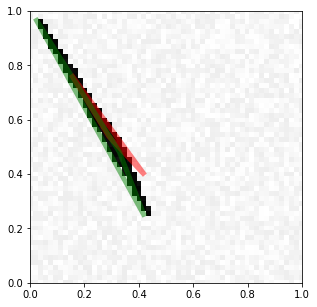

[0.386668   0.52965844 0.35253465 0.5617638  0.29315013 0.80515885] : [0.40296493 0.46678119 0.19329222 0.85411189 0.50426537 0.69239011]


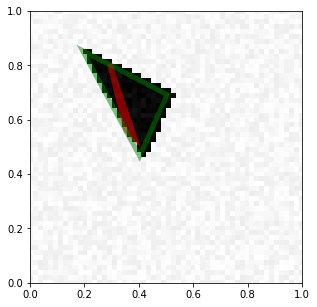

[0.41505995 0.57510996 0.55463105 0.65637916 0.8964796  0.6919533 ] : [0.40750198 0.54092585 0.97565917 0.65837555 0.25694576 0.79408686]


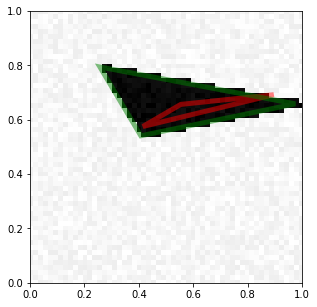

[0.2547458  0.10769538 0.44673613 0.33577487 0.77137756 0.5213642 ] : [0.69625218 0.60646976 0.50122061 0.26188373 0.24011516 0.12670457]


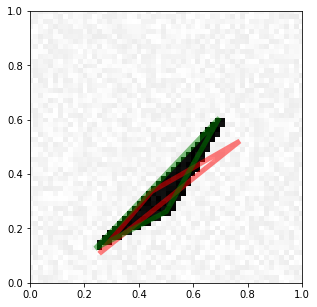

[0.62921625 0.44117066 0.71506655 0.4248322  0.891179   0.3678736 ] : [0.86242527 0.52598161 0.96297636 0.48452786 0.77215086 0.20221824]


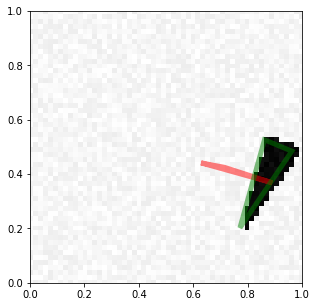

[0.6017495  0.21690765 0.70761937 0.6521548  1.1240685  0.6446858 ] : [0.5273259  0.10477819 0.67230894 0.99141347 0.99864744 0.46535389]


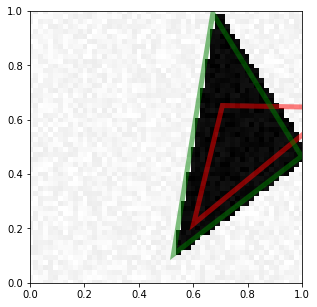

[0.10614948 0.02698372 0.36212817 0.1109959  0.6538031  0.2602703 ] : [0.19442549 0.3877962  0.81969062 0.03490978 0.04171056 0.0962916 ]


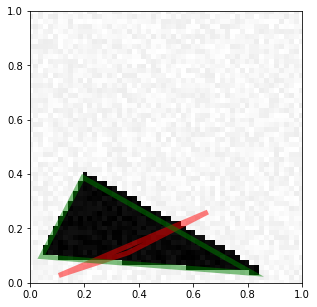

[0.6409067  0.4763441  0.7125859  0.43116456 0.745085   0.59059924] : [0.86081012 0.33144544 0.75918231 0.64737902 0.64072059 0.76947606]


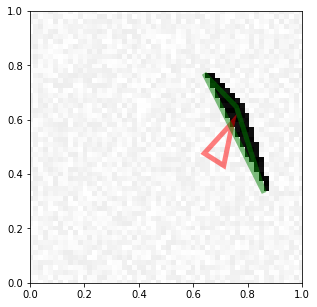

[0.50520253 0.41411573 0.45829514 0.4988412  0.25946313 0.85767037] : [0.36521114 0.39272056 0.70665336 0.3115699  0.19556261 0.92450911]


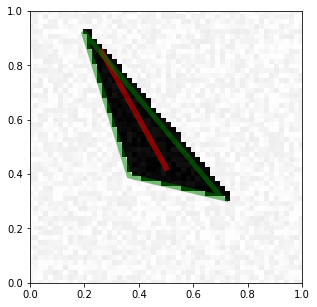

[0.4125335  0.6054056  0.5473634  0.70894766 0.7747274  0.7310862 ] : [0.8701088  0.52874067 0.48104054 0.57317172 0.25666823 0.90811039]


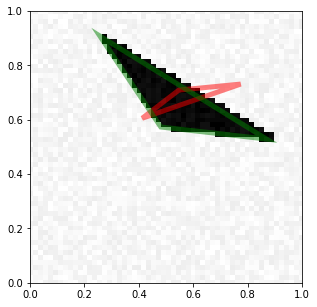

[0.22193214 0.60258424 0.19637719 0.86810714 0.4100452  0.95196694] : [0.18028874 0.42015183 0.07715401 0.95847906 0.53938654 0.88136528]


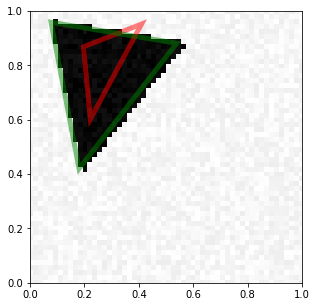

[0.57921904 0.38462597 0.66595775 0.25666344 0.6838804  0.31334835] : [0.93276232 0.09519099 0.91260695 0.03430536 0.27122147 0.72105407]


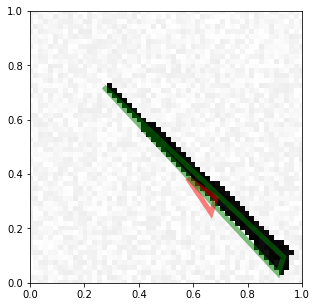

In [45]:
for i in slice:
     visualize_prediction(X_test[i], Y_pred[i], Y_test[i])

#### We can see from the picture that, green part is the actual image, and the red part is the prediction. The result of the prediction are not so perfect, which can also be observed according to the accuracy rate.